C:\Users\dhana\Anaconda3\lib\site-packages\ipykernel_launcher.py:90: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\dhana\Anaconda3\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\dhana\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


for M 4


C:\Users\dhana\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'color'
  s)
C:\Users\dhana\Anaconda3\lib\site-packages\ipykernel_launcher.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


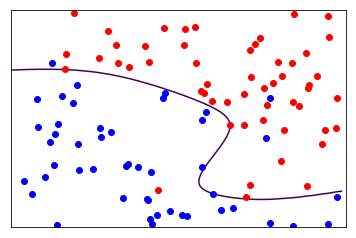

for M 6


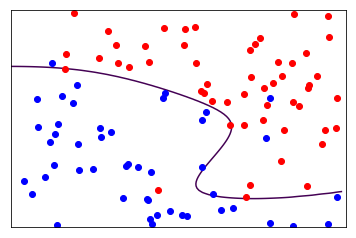

for M 7


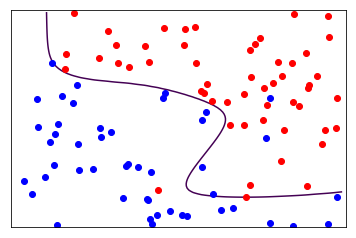

for M 8


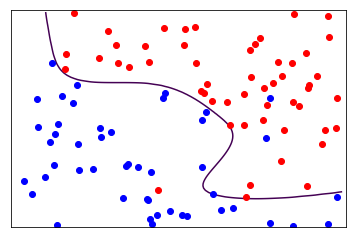

for M 10


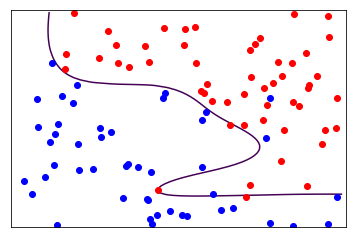

for M 15


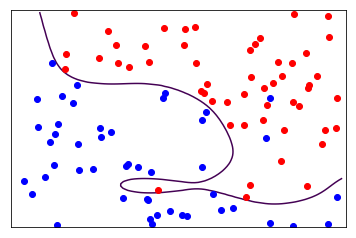

In [19]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.
from __future__ import division
import numpy as np
import numpy.matlib as nm
import matplotlib.pyplot as plt
from sympy import *
import math

def single_layer_classification_hw():

    # load data
    
    global M
    M=[4,6,7,8,10,15]
    for i in M:
        #M = 4 # number of hidden units
        X, y = load_data()
        M=int(i)
        print("for M",i)
        b,w,c,V = tanh_softmax(X.T,y,M)
        plot_separator(b,w,c,V,X,y)
        plt.show()


### gradient descent for single layer tanh nn ###
def tanh_softmax(X,y,M):

    y = np.reshape(y,(np.size(y),1))

    # initializations
    N = np.shape(X)[0]
    P = np.shape(X)[1]

    b = np.random.randn()
    w = np.random.randn(M,1)
    c = np.random.randn(M,1)
    V = np.random.randn(N,M)
    l_P = np.ones((P,1))
    # stoppers
    max_its = 10000
    grad = 1
    count = 1

    ### main ###
    while (count <= max_its) & (np.linalg.norm(grad) > 1e-5):
        F = obj(c, V, X)
        q = sigmoid(-y * (b * l_P + np.dot(F.T, w)))
        new_F = obj1(c, V, X)
        q1 = nm.repmat(q, 1, M)
        y1 = nm.repmat(y, 1, M)
        w1 = nm.repmat(w.T, N, 1)
        t1 = F.T
        s1 = new_F.T

        grad_b = - np.dot(l_P.T,(q*y))
        grad_w = - np.dot(l_P.T,q1*F.T*y1).T
        grad_c = - (np.dot(l_P.T,q1*s1*y1)).T * w
        grad_V = np.dot(-X, (q1 * s1 * y1)) * w1
        

        # determine steplength
        alpha = 1e-2

        # take gradient steps
        b = b - alpha*grad_b
        w = w - alpha*grad_w
        c = c - alpha*grad_c
        V = V - alpha*grad_V

        # update stoppers
        count = count + 1

    return b, w, c, V


### load data
def load_data():

    data = np.array(np.genfromtxt('genreg_data.csv', delimiter=','))
    A = data[:,0:-1]
    b = data[:,-1]

    # plot data
    ind = np.nonzero(b==1)[0]
    plt.plot(A[ind,0],A[ind,1],'ro')
    ind = np.nonzero(b==-1)[0]
    plt.plot(A[ind,0],A[ind,1],'bo')
    plt.hold(True)
    return A,b



def sigmoid(z):
    return 1/(1+np.exp(-z))


# plot the seprator + surface
def plot_separator(b,w,c,V,X,y):

    s = np.arange(-1,1,.01)
    s1, s2 = np.meshgrid(s,s)

    s1 = np.reshape(s1,(np.size(s1),1))
    s2 = np.reshape(s2,(np.size(s2),1))
    g = np.zeros((np.size(s1),1))

    t = np.zeros((2,1))
    for i in np.arange(0,np.size(s1)):
        t[0] = s1[i]
        t[1] = s2[i]
        F = obj(c,V,t)
        g[i] = np.tanh(b + np.dot(F.T,w))

    s1 = np.reshape(s1,(np.size(s),np.size(s)))
    s2 = np.reshape(s2,(np.size(s),np.size(s)))
    g = np.reshape(g,(np.size(s),np.size(s)))

    # plot contour in original space
    plt.contour(s1,s2,g,1,color = 'k')
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.hold(true)


def obj(z,H,A):
    F = np.zeros((M,np.shape(A)[1]))
    for p in np.arange(0,np.shape(A)[1]):
        F[:,p] = np.ravel(np.tanh(z + np.dot(H.T,np.reshape(A[:,p],(np.shape(A)[0],1)))))

    return F

def obj1(z,H,A):
    F = np.zeros((M,np.shape(A)[1]))
    for p in np.arange(0,np.shape(A)[1]):
        F[:,p] = np.ravel(1/np.cosh(z + np.dot(H.T,np.reshape(A[:,p],(np.shape(A)[0],1))))**2)

    return F

single_layer_classification_hw()